# ATMO 656A - Homework 2 (Part b: g = 0.85)

Edgardo I. Sepulveda Araya

Importing libraries:

In [1]:
import numpy as np
import random                   # Library to create a random number
import time                     # Library to retrieve computing time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

In [2]:
# My colors for figures:
colors = [(29/255,91/255,162/255), (169/255,23/255,38/255),
          (229/255,179/255,69/255), (131/255,170/255,69/255),
          (116/255,24/255,123/255), (202/255,91/255,46/255),
          (107/255,188/255,233/255), 'grey', 'black'] 

### Scattering Distribution Function:

In [3]:
def scatang(N, intervals, g):
    mu    = np.zeros(N+1)
    amu   = np.zeros(N)
    THETA = np.zeros(N)
    mu[0] = -1.0
    
    a = (2*g) / (N * (1 - g**2))
    
    for i in range(N):
        b = np.sqrt(1 + g**2 - 2*g*mu[i])
        mu[i+1]  = (1 / (2*g)) * (1 + g**2 - 1/((a + 1/b)**2))
        amu[i]   = (mu[i+1] + mu[i]) / 2.0
        THETA[i] = np.arccos(amu[i]) # In radians
        
    return amu, THETA

$\Theta$ is respect to complete forward direction

#### Testing scatang function by using the Henyey-Greenstein scattering function:

In [4]:
N         = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals = np.zeros(N)

In [10]:
scat_test_099 = scatang(N, intervals, 0.99)
scat_test_085 = scatang(N, intervals, 0.85)
scat_test_075 = scatang(N, intervals, 0.75)
scat_test_001 = scatang(N, intervals, 0.001)

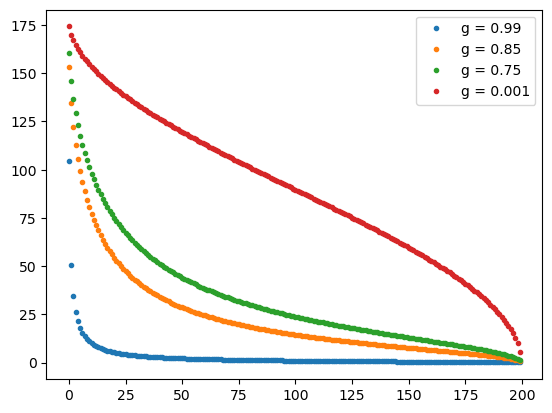

In [11]:
plt.plot(np.rad2deg(scat_test_099[1]), '.', label = 'g = 0.99')
plt.plot(np.rad2deg(scat_test_085[1]), '.', label = 'g = 0.85')
plt.plot(np.rad2deg(scat_test_075[1]), '.', label = 'g = 0.75')
plt.plot(np.rad2deg(scat_test_001[1]), '.', label = 'g = 0.001')

plt.legend()

In [7]:
gs      = [0.001, 0.1, 0.3, 0.5, 0.8, 0.9, 0.95]
p_theta = np.zeros((N,len(gs)))
thetas  = np.zeros((N,len(gs)))
for i in range(len(gs)):
    gi = gs[i]
    theta_test   = scatang(N, intervals, gi)
    p_theta_i    = (1/(4*np.pi)) * ( (1-gi**2) / ( (1+gi**2-2*gi*np.cos(theta_test[1]))**(3/2) ) )
    thetas[:,i]  = np.rad2deg(theta_test[1])
    p_theta[:,i] = p_theta_i

Figure:

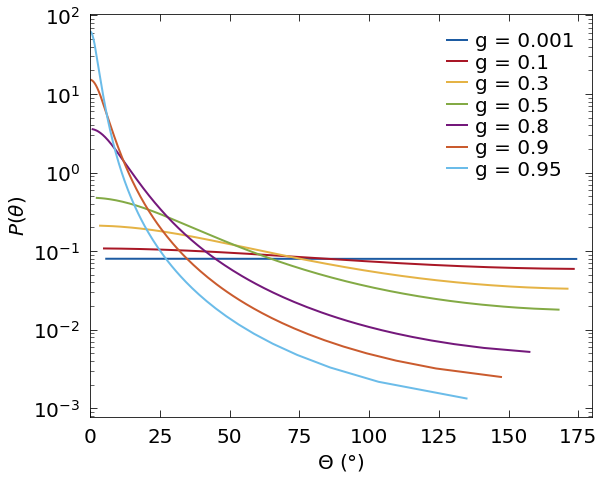

In [8]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.2, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []
for i in range(len(gs)):
    globals()['h'+str(i)] = ax.plot(thetas[:,i], p_theta[:,i],
                                    color = colors[i], alpha = 1,
                                    linestyle = 'solid', linewidth = 2)
    handles = handles + eval('h'+str(i))
    labels.append('g = ' + str(gs[i]))

# X Axis:
ax.set_xlabel(r'$\Theta$ (°)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(0, 180)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
# Y Axis:
ax.set_ylabel(r'$P(\theta)$', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_ylim(0,20)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.set_yscale('log')

# LEGEND:
legend  = ax.legend(handles, labels, loc='upper right', ncol=1,
                    handlelength = 1, handletextpad = .4, labelspacing = .12,
                    columnspacing = 1.5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

### Monte Carlo Radiative Transfer Function:

In [4]:
def mc_radtran(n_photons, g, w_0, mu_0, tau):
    time_start_gen = time.time()
    
    theta_0 = np.arccos(mu_0) # Zenith angle (respect to z axis?) in radians (THETA0) (use np.rad2deg() to transform to degrees)
    phi_0   = 3*np.pi/2 # Is this angle phi from spherical coordinates? (270º)
    x0      = 0 # Initital position x (X0 = 0.0)
    y0      = 0 # Initial position y (Y0 = 0.0)
    l_0     = 1 # units?
    z_base  = 0 # Position of "cloud" base (ZBASE = 0.0)
    z_top   = tau / l_0  # Position of "cloud" top (ZTOP = 4.0) From z_top = tau / l_0 = tau / 1
    z0      = z_top # (Z0 = ZTOP)
    
    N_R = 0 # Number of photons reflected
    N_T = 0 # Number of photons tramsitted
    N_A = 0 # Number of photons absorbed

    #l_list = []
    x_list = []
    y_list = []
    z_list = []
    N_I_list = []
    #R_list = []
    #T_list = []
    #A_list = []
    #theta_list = []
    #THETA_s_list = []
    time_per_photon_list = []
    
    Ti_list = []
    Ri_list = []
    Ai_list = []

    for i in range(n_photons):
        time_start_per_photon = time.time()
        N_I_list.append(i + 1)
        #l_photon_list = []
        x_photon_list = []
        y_photon_list = []
        z_photon_list = []
        #theta_photon_list = []
        #THETA_s_photon_list = []

        theta = theta_0
        phi   = phi_0
        # random number in interval [0, 1) for free path (ran1(II))
        Ri = random.random()
        #while Ri == 0: Ri = np.random.random(1)[0] # To avoid l = 0
        l = -1.0 * np.log(1 - Ri) # Free Path
        #l_photon_list.append(l)
        x = x0 + l * np.sin(theta) * np.cos(phi) # First step change in x
        x_photon_list.append(x)
        y = y0 + l * np.sin(theta) * np.sin(phi) # First step change in y
        y_photon_list.append(y)
        z = z0 + l * np.cos(theta)               # First step change in z
        z_photon_list.append(z)

        #kkk = 0
        while True: # Photon collision iteration
            # Absorption:
            # random number in interval [0, 1] to check scattering or absoprtion (ran1(II)):
            Ri = random.uniform(0,1)
            if w_0 < Ri: 
                N_A += 1
                break

            # Reflection:
            if z > z_top:
                N_R += 1
                break

            # Transmission:
            if z < z_base:
                N_T += 1
                break

            # random number in interval [0, 1) to pick any scattering angle from distribution created (ran1(II)):
            Ri          = random.random()
            THETA_s_pos = int(Ri * 200)
            THETA_s     = THETA_s_distribution[1][THETA_s_pos]

            # random number in interval [0, 1) to pick any PHI scattering angle (ran1(II)):
            Ri         = random.random()
            PHI_s      = 2 * np.pi * Ri

            # random number in interval [0, 1) for free path (ran1(II))
            Ri = random.random()
            #while Ri == 0: Ri = np.random.random(1)[0] # To avoid l = 0
            l = -1.0 * np.log(1 - Ri)
            dx = l * (np.sin(THETA_s) * np.sin(PHI_s) * np.cos(theta) * np.cos(phi) + np.sin(THETA_s) * np.cos(PHI_s) * np.sin(phi) +
                      np.cos(THETA_s) * np.sin(theta) * np.cos(theta))
            dy = l * (np.sin(THETA_s) * np.sin(PHI_s) * np.cos(theta) * np.sin(phi) - np.sin(THETA_s) * np.cos(PHI_s) * np.cos(phi) +
                      np.cos(THETA_s) * np.sin(theta) * np.sin(phi))
            dz = l * (np.cos(THETA_s) * np.cos(theta)
                      - np.sin(THETA_s) * np.sin(PHI_s) * np.sin(theta))

            x += dx
            y += dy
            z += dz

            x_photon_list.append(x)
            y_photon_list.append(y)
            z_photon_list.append(z)
            #l_photon_list.append(l)
            #theta_photon_list.append(np.rad2deg(theta))
            #THETA_s_photon_list.append(np.rad2deg(THETA_s))
            # Save phi and PHI_s

            theta = np.arccos(dz / l)

            if dx == 0:
                if dy >= 0: 
                    phi = np.pi / 2
                else:
                    phi = 3*np.pi / 2
            else:
                phi = np.arctan(dy / dx)
                if dx < 0:
                    phi += np.pi
                elif dy < 0:
                    phi += 2 * np.pi

            #kkk=kkk+1
        x_list.append(x_photon_list)
        y_list.append(y_photon_list)
        z_list.append(z_photon_list)
        
        Ti = N_T / (i+1)
        Ri = N_R / (i+1)
        Ai = N_A / (i+1)
        
        Ti_list.append(Ti)
        Ri_list.append(Ri)
        Ai_list.append(Ai)        
        
        #T = N_T / n_photons
        #R = N_R / n_photons
        #A = N_A / n_photons

        #T_list.append(T)
        #R_list.append(R)
        #A_list.append(A)

        dt = time.time() - time_start_per_photon
        dt_ms = round(dt*1000,3)
        time_per_photon_list.append(dt_ms)
        #print(i+1,'photon:, T = ',T,'; R = ',R,'; A = ',A,'; Time elapsed:',dt_ms,'ms')
    
    return [N_I_list, Ti_list, Ri_list, Ai_list, time_per_photon_list], [x_list, y_list, z_list]

    time_elapsed = (time.time() - time_start_gen)
    time_elapsed = round(time_elapsed,3)
    #print('Total Execution Time:', time_elapsed, 's')

## Main code

### QUESTION 3

In [177]:
n_photons = 10000 # (NUMBER)
g         = 0.75
mu_0      = np.arange(-0.9, -0.1+0.04, 0.04)[::-1] # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
w_0       = 1 # [1, 0.95, 0.85, 0.75] # Single Scattering Albedo (We start with no absorption) (mm = 9.999 and mu0 = -0.7)
tau       = 4 # Optical Depth

In [178]:
N                    = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals            = np.zeros(N)
THETA_s_distribution = scatang(N, intervals, g)

In [179]:
Tq3 = []
Rq3 = []
Aq3 = []
for i in range(len(mu_0)):
    opt_prop = mc_radtran(n_photons, g, w_0, mu_0[i], tau)
    Tq3.append(round(opt_prop[0][1][-1],3))
    Rq3.append(round(opt_prop[0][2][-1],3))
    Aq3.append(round(opt_prop[0][3][-1],3))
    timei = round(sum(opt_prop[0][4])*0.001,2)
    print('mu_0:',mu_0[i],', Time:',timei)

mu_0: -0.09999999999999931 , Time: 1.74
mu_0: -0.13999999999999935 , Time: 1.61
mu_0: -0.17999999999999938 , Time: 1.7
mu_0: -0.21999999999999942 , Time: 1.75
mu_0: -0.25999999999999945 , Time: 1.8
mu_0: -0.2999999999999995 , Time: 1.86
mu_0: -0.3399999999999995 , Time: 1.92
mu_0: -0.37999999999999956 , Time: 2.17
mu_0: -0.4199999999999996 , Time: 1.99
mu_0: -0.45999999999999963 , Time: 2.06
mu_0: -0.49999999999999967 , Time: 2.1
mu_0: -0.5399999999999997 , Time: 2.04
mu_0: -0.5799999999999997 , Time: 2.04
mu_0: -0.6199999999999998 , Time: 2.26
mu_0: -0.6599999999999998 , Time: 1.98
mu_0: -0.6999999999999998 , Time: 2.03
mu_0: -0.7399999999999999 , Time: 1.97
mu_0: -0.7799999999999999 , Time: 1.89
mu_0: -0.82 , Time: 1.86
mu_0: -0.86 , Time: 1.84
mu_0: -0.9 , Time: 2.0


Text(0.95, 0.95, '$\\omega_0$ = 1\ng = 0.75\n$\\tau$ = 4')

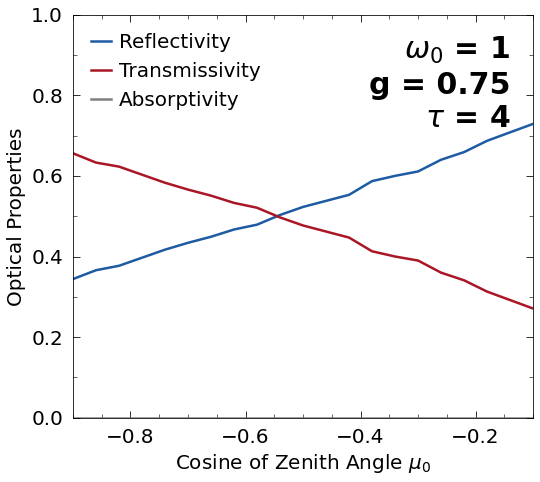

In [180]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(mu_0, Rq3, color = colors[0], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h2 = ax.plot(mu_0, Tq3, color = colors[1], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h3 = ax.plot(mu_0, Aq3, color = 'grey', alpha = 1, linestyle = 'solid', linewidth = 2.5)
handles = h1 + h2 + h3
labels  = ['Reflectivity', 'Transmissivity', 'Absorptivity']

# X Axis:
ax.set_xlabel(r'Cosine of Zenith Angle $\mu_0$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(-.9, -.1)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
#ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.05))

# Y Axis:
ax.set_ylabel('Optical Properties', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 1, handletextpad = .4, labelspacing = .5,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.95, 0.95, r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\tau$ = '+str(4), fontsize = fontsize1+10, fontweight = 'bold',
        color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

### QUESTION 4

In [135]:
n_photons = 10000 # (NUMBER)
g         = 0.85
mu_0      = -0.7 # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
w_0       = 0.75 # [1, 0.95, 0.85, 0.75] # Single Scattering Albedo (We start with no absorption) (mm = 9.999 and mu0 = -0.7)
tau       = np.arange(1, 8.35,  0.35) # Optical Depth

In [136]:
N                    = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals            = np.zeros(N)
THETA_s_distribution = scatang(N, intervals, g)

In [137]:
Tq4          = []
Rq4          = []
Aq4          = []
globals()['time_per_tau_'+str(int(w_0*100))+'_'+str(int(g*100))] = []
for i in range(len(tau)):
    opt_prop = mc_radtran(n_photons, g, w_0, mu_0, tau[i])
    Tq4.append(round(opt_prop[1][1][-1],3))
    Rq4.append(round(opt_prop[1][2][-1],3))
    Aq4.append(round(opt_prop[1][3][-1],3))
    timei = round(sum(opt_prop[1][4])*0.001,2)
    eval('time_per_tau_'+str(int(w_0*100))+'_'+str(int(g*100))).append(timei)
    print('tau:',tau[i],', Time:',timei)

tau: 1.0 , Time: 0.31
tau: 1.35 , Time: 0.39
tau: 1.7000000000000002 , Time: 0.45
tau: 2.0500000000000003 , Time: 0.49
tau: 2.4000000000000004 , Time: 0.52
tau: 2.7500000000000004 , Time: 0.55
tau: 3.1000000000000005 , Time: 0.58
tau: 3.4500000000000006 , Time: 0.56
tau: 3.8000000000000007 , Time: 0.62
tau: 4.15 , Time: 0.65
tau: 4.500000000000001 , Time: 0.63
tau: 4.850000000000001 , Time: 0.62
tau: 5.200000000000001 , Time: 0.64
tau: 5.550000000000001 , Time: 0.65
tau: 5.900000000000001 , Time: 0.66
tau: 6.250000000000002 , Time: 0.66
tau: 6.600000000000001 , Time: 0.69
tau: 6.950000000000001 , Time: 0.69
tau: 7.300000000000002 , Time: 0.68
tau: 7.650000000000002 , Time: 0.69
tau: 8.000000000000002 , Time: 0.69


Text(0.95, 0.95, '$\\omega_0$ = 0.75\ng = 0.85\n$\\mu_0$ = -0.7')

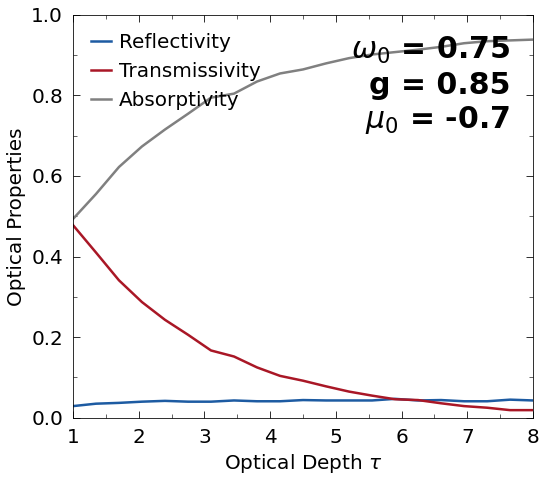

In [138]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(tau, Rq4, color = colors[0], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h2 = ax.plot(tau, Tq4, color = colors[1], alpha = 1, linestyle = 'solid', linewidth = 2.5)
h3 = ax.plot(tau, Aq4, color = 'grey', alpha = 1, linestyle = 'solid', linewidth = 2.5)
handles = h1 + h2 + h3
labels  = ['Reflectivity', 'Transmissivity', 'Absorptivity']

# X Axis:
ax.set_xlabel(r'Optical Depth $\tau$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(1, 8)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
#ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))

# Y Axis:
ax.set_ylabel('Optical Properties', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 1, handletextpad = .4, labelspacing = .5,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.95, 0.95, r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\mu_0$ = '+str(-0.7), fontsize = fontsize1+10, fontweight = 'bold',
        color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

### Computing Time

Execute next cells only once per run:

C:\Users\edgardo\AppData\Local\Temp\ipykernel_16516\4092499174.py:48: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('black')
C:\Users\edgardo\AppData\Local\Temp\ipykernel_16516\4092499174.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('black')


Text(0.07, 0.6, '$\\omega_0$ = 0.75')

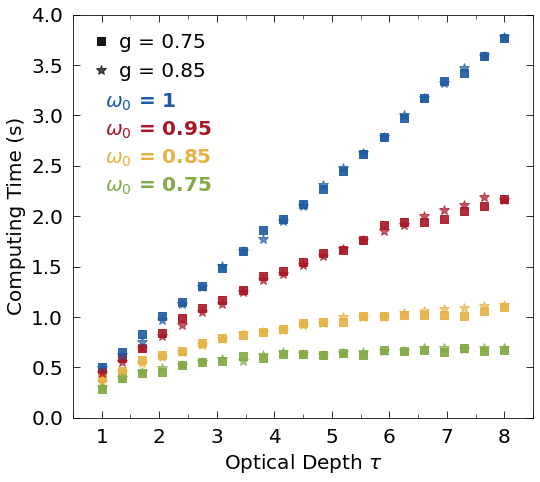

In [139]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

handles = []
labels  = []

h1 = ax.plot(tau, time_per_tau_100_75, 's', markersize = 8, color = colors[0], alpha = .9)
h2 = ax.plot(tau, time_per_tau_95_75, 's', markersize = 8, color = colors[1], alpha = .9)
h3 = ax.plot(tau, time_per_tau_85_75, 's', markersize = 8, color = colors[2], alpha = .9)
h4 = ax.plot(tau, time_per_tau_75_75, 's', markersize = 8, color = colors[3], alpha = .9)
h5 = ax.plot(tau, time_per_tau_100_85, '*', markersize = 10, color = colors[0], alpha = .7)
h6 = ax.plot(tau, time_per_tau_95_85, '*', markersize = 10, color = colors[1], alpha = .7)
h7 = ax.plot(tau, time_per_tau_85_85, '*', markersize = 10, color = colors[2], alpha = .7)
h8 = ax.plot(tau, time_per_tau_75_85, '*', markersize = 10, color = colors[3], alpha = .7)
handles = h1 + h5
labels  = ['g = 0.75', 'g = 0.85']

# X Axis:
ax.set_xlabel(r'Optical Depth $\tau$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(0.5, 8.5)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))

# Y Axis:
ax.set_ylabel('Computing Time (s)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 4)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
#ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 1, handletextpad = .4, labelspacing = .5,
                    columnspacing = .5, numpoints = 1, frameon = False,
                    prop = {'size': fontsize1})

ax2 = plt.gca()
leg = ax2.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

# ADDITIONAL TEXT:
ax.text(0.07, 0.81, r'$\omega_0$ = '+str(1), fontsize = fontsize1, fontweight = 'bold',
        color = colors[0], ha = 'left', va = 'top', transform = ax.transAxes)
ax.text(0.07, 0.74, r'$\omega_0$ = '+str(0.95), fontsize = fontsize1, fontweight = 'bold',
        color = colors[1], ha = 'left', va = 'top', transform = ax.transAxes)
ax.text(0.07, 0.67, r'$\omega_0$ = '+str(0.85), fontsize = fontsize1, fontweight = 'bold',
        color = colors[2], ha = 'left', va = 'top', transform = ax.transAxes)
ax.text(0.07, 0.60, r'$\omega_0$ = '+str(0.75), fontsize = fontsize1, fontweight = 'bold',
        color = colors[3], ha = 'left', va = 'top', transform = ax.transAxes)

## Photon tracking

In [80]:
n_photons = 10000 # (NUMBER)
g         = 0.85
mu_0      = -0.7 # Cosine of zenith angle (solar zenith angle?) respect to z axis? (mu0 = -0.7)
w_0       = 0.95 # [1, 0.95, 0.85, 0.75] # Single Scattering Albedo (We start with no absorption) (mm = 9.999 and mu0 = -0.7)
tau       = 8 # Optical Depth

In [81]:
N                    = 200 # Number of intervals in scattering probabilty distribution (NNN = 200)
intervals            = np.zeros(N)
THETA_s_distribution = scatang(N, intervals, g)

In [82]:
traj = mc_radtran(n_photons, g, w_0, mu_0, tau)

Text(0.95, 0.05, 'T = 0.234\nR = 0.238\nA = 0.528')

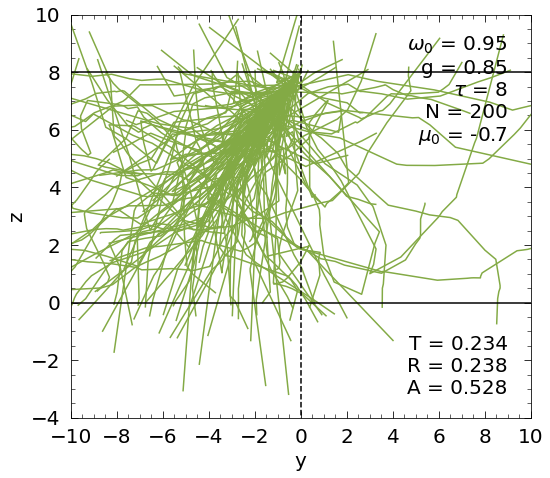

In [83]:
fontsize1 = 20 
height    = 7
f, ax     = plt.subplots(figsize = (height*1.1, height), dpi = 72) 
f.subplots_adjust(top = .95, bottom = .15, left = .12, right = .95)

for i in range(200):
    ax.plot(traj[1][1][i], traj[1][2][i], color = (131/255,170/255,69/255), 
             alpha = 1, linestyle = 'solid', linewidth = 1.5)

plt.hlines(0, -100, 100, color='black')
plt.hlines(8, -100, 100, color='black')
plt.vlines(0, -100, 100, color='black', linestyle = 'dashed')

# X Axis:
ax.set_xlabel('y', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(-10, 10)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
#ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.5))

# Y Axis:
ax.set_ylabel('z', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(-4, 10)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.5))


# ADDITIONAL TEXT:
plt.text(0.95, 0.95, (r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\tau$ = '+str(tau)+'\n'+r'N = '
                      +str(i+1)+'\n'+r'$\mu_0$ = '+str(mu_0)),
         color = 'black', ha = 'right', va = 'top',  transform = ax.transAxes, fontsize = fontsize1)
Tf = str(round(traj[0][1][-1],3))
Rf = str(round(traj[0][2][-1],3))
Af = str(round(traj[0][3][-1],3))
plt.text(0.95, 0.05, ('T = '+Tf+'\n'+'R = '+Rf+'\n'+'A = '+Af),
         color = 'black', ha = 'right', va = 'bottom',  transform = ax.transAxes, fontsize = fontsize1)